# SLC Housing Price Analysis

## Part 1
- the null hypothesis is that both the A and B logo will perform the same
- the alternative hypothesis is that the proportion of ad clicks for the B logo will be higher than the A logo

In [359]:
import pandas as pd
import numpy as np
from scipy.stats import norm

#calculate the sample proportions
clicks_a  = 500
views_a = 1000
a_p_sample_proportion = clicks_a/views_a
print(a_p_sample_proportion)

clicks_b = 550
views_b = 1000
b_p_sample_proportion = clicks_b/views_b
print(b_p_sample_proportion)

#calculate the pooled proportion
pooled_proportion = (clicks_a + clicks_b)/(views_a + views_b)
print(pooled_proportion)

#calculate standard error
standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1 / views_a + 1 / views_b))
print(standard_error)

#calculate z value stat
z_stat = (b_p_sample_proportion - a_p_sample_proportion)/standard_error
print(z_stat)

#calculate p_val_one_sided
p_val_one_sided = 1 - norm.cdf(z_stat)
print(p_val_one_sided)

#declare significance values
significance_level_5 = 0.05
significance_level_1 = 0.01

if p_val_one_sided < significance_level_5:
    print("reject null")
else: 
    print("fail to reject null")

if p_val_one_sided < significance_level_1:
    print("reject null")
else: 
    print("fail to reject null")


#add some more tests with change the b clicked and a clicked while predicting what will happen to the p value 




0.5
0.55
0.525
0.022332711434127295
2.238868314198227
0.012582242850159187
reject null
fail to reject null


### Part 1 Conclusion

- This data provides a P-Value of 0.0128. This means we reject the null hypothesis when observing the data with a significance value of 0.05. This implies that logo B generates significantly more clicks that logo A. However, we fail to reject the null hypothesis when using a significance value of 0.01. Meaning that there is no sigificant difference in click rates for the two logos.


# part 2
## task 1 and task 2:

In [360]:
house_data_1 = pd.read_csv('data/realEstate1.csv')
house_data_2 = pd.read_csv('data/realEstate2.csv')

#concatinate the data
house_data_combined = pd.concat([house_data_1, house_data_2], ignore_index=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#display(house_data_combined)

filtered_data = house_data_combined[(house_data_combined['LstPrice'] >= 200000) & (house_data_combined['LstPrice'] <= 1000000)]


important_columns = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

filtered_data = filtered_data[important_columns]

#display(filtered_data)


#setting a number for 'PropType' 
prop_type = {
    'PropType' : ['Condo','Townhouse', 'Single Family'],
    'PropTypeNum' : [0, 0,  1]
}
prop_type_df = pd.DataFrame(prop_type)
filtered_data = pd.merge(filtered_data, prop_type_df, on= 'PropType', how ='left')

#removing the comma fro the total sqft string and changing it to an int
filtered_data['TotSqf'] = filtered_data['TotSqf'].str.replace(',','').astype(int)

#removing the unreasonably large tax values
filtered_data = filtered_data[(filtered_data['Taxes'] <= 10000)]
highest_tax = filtered_data['Taxes'].max()
print(highest_tax)

#removing any 0 'Longitude'
filtered_data = filtered_data[(filtered_data['Longitude'] != 0)]


#display current table!
display(filtered_data)






9205


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,PropTypeNum
0,0.29,1,3,40.779524,-111.893542,725000,1,0,Single Family,752000,7244,4.0,5.0,5415,1998,1
1,0.01,0,0,40.773243,-111.883291,205000,0,0,Condo,205000,1431,2.0,1.0,924,1965,0
2,0.11,0,0,40.773972,-111.867470,390000,1,0,Single Family,390000,1816,3.0,1.0,1702,1940,1
3,0.14,0,1,40.783009,-111.872100,445000,1,3,Single Family,443000,3260,3.0,2.0,1756,1940,1
4,0.01,0,2,40.771693,-111.886951,339000,0,2,Condo,334000,2141,3.0,2.0,1368,1976,0
5,0.14,1,2,40.783889,-111.872194,600000,1,2,Single Family,570000,4197,3.0,3.0,2956,1950,1
6,0.01,1,0,40.775431,-111.873783,209900,0,1,Condo,215000,1478,2.0,2.0,1085,1968,0
7,0.09,0,0,40.775075,-111.872260,399900,1,3,Single Family,399000,2207,3.0,2.0,1539,1916,1
8,0.01,1,1,40.772489,-111.884959,450000,0,0,Condo,445500,2904,2.0,3.0,2113,1985,0
9,0.07,0,0,40.772800,-111.877568,300000,0,2,Single Family,300000,2077,2.0,1.0,1082,1891,1


# Task 3: Exploratory data analysis:
- after  filtering down the data based on the parameters of houses between $200,000 and $1,000,000, there are now 262 houses within the data set. 
- At a glance, single family homes seem to be the most popular in the dataset, followed by Condos then Townhouses.



<function matplotlib.pyplot.show(close=None, block=None)>

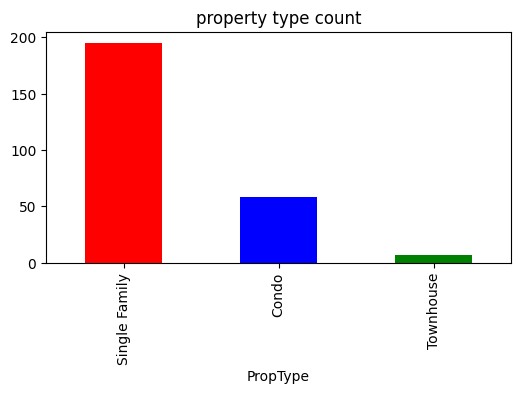

In [361]:
import matplotlib.pyplot as plt 
import seaborn as sns

prop_type_count = filtered_data['PropType'].value_counts()
plt.figure(figsize= (6, 3))
colors = ['red', 'blue', 'green']
prop_type_count.plot(kind = 'bar', color = colors)
plt.title('property type count')
plt.show


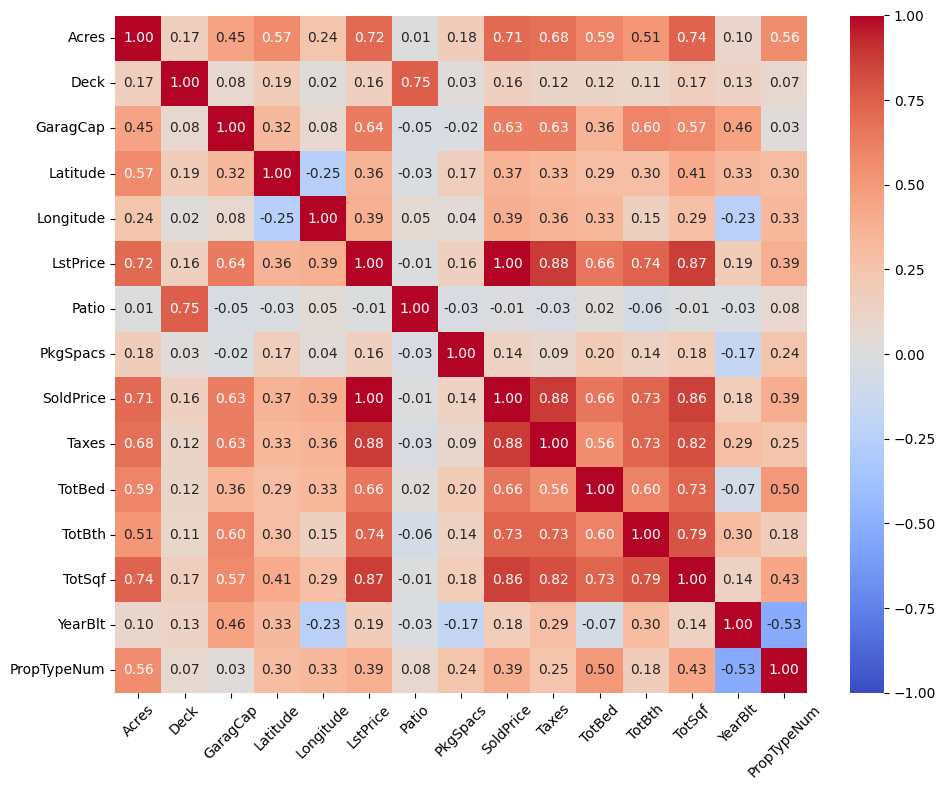

In [362]:
#removing the PropType
filtered_data.drop('PropType', axis= 1, inplace= True)
correlation_matrix = filtered_data.corr()

plt.figure(figsize= (10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

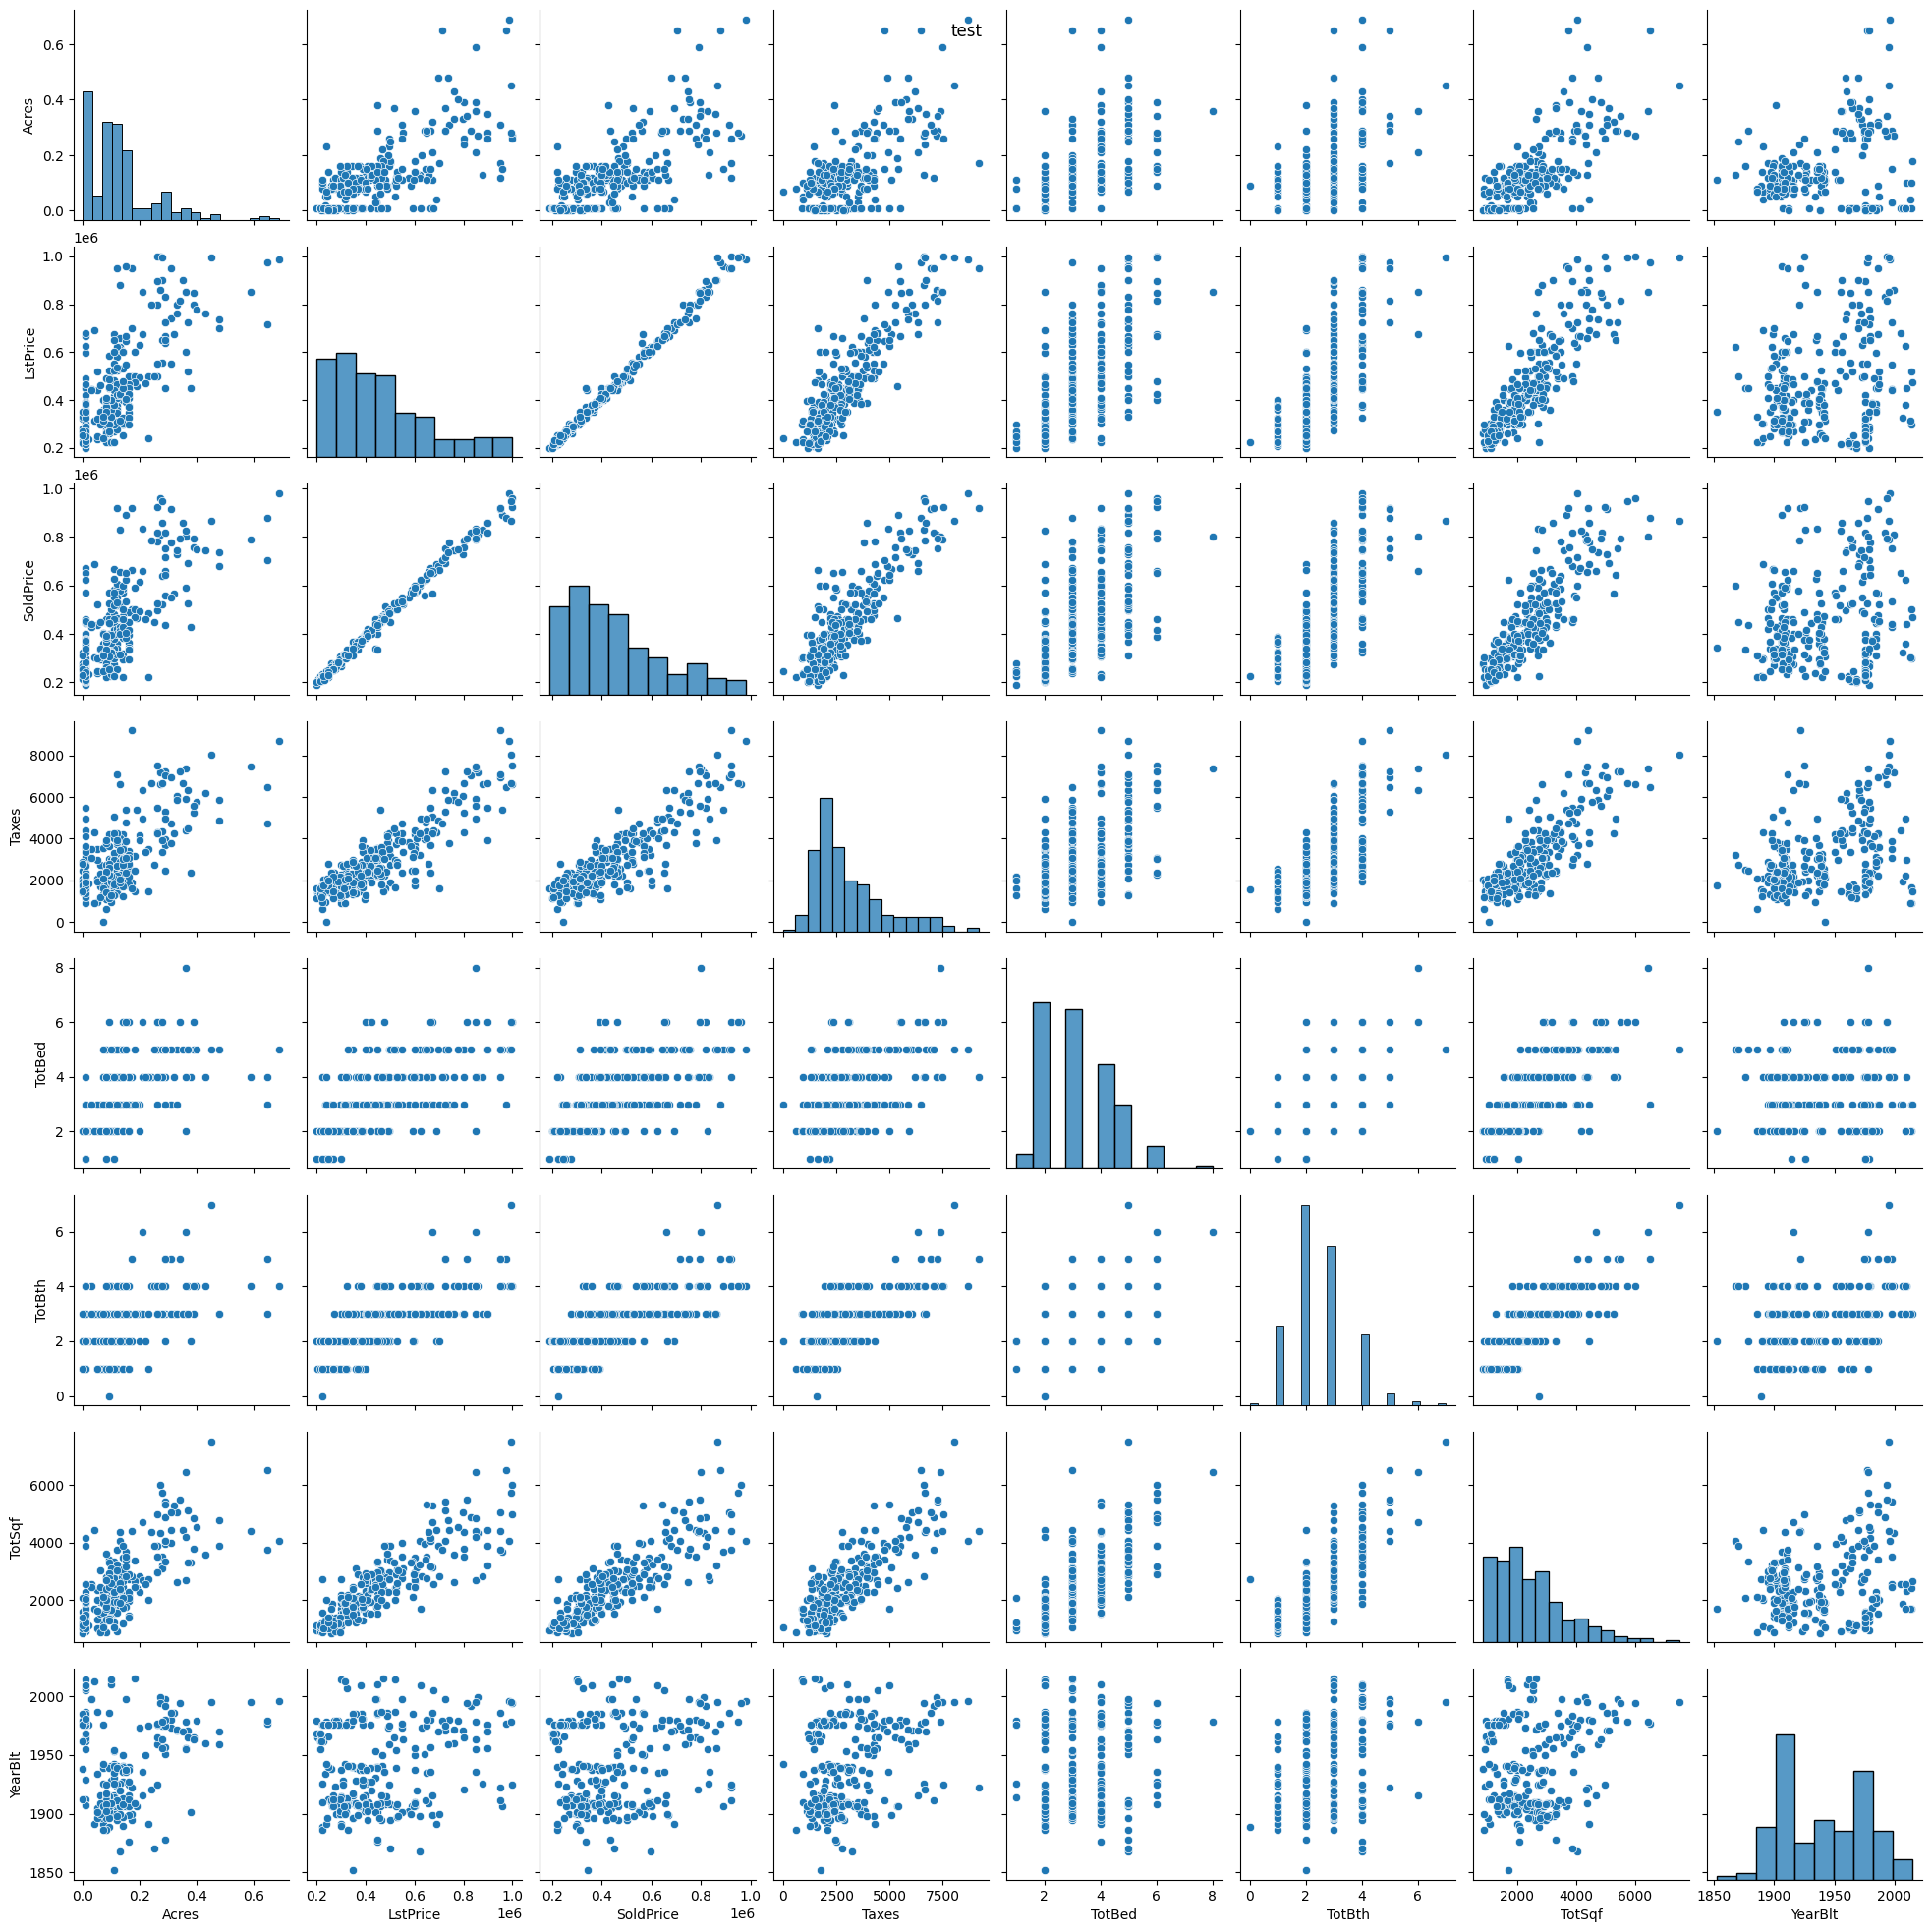

<Figure size 1000x1000 with 0 Axes>

In [363]:
scatter_columns = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

scatter = filtered_data[scatter_columns]

sns.pairplot(scatter)
plt.suptitle('test')
plt.figure(figsize= (10, 10))
plt.show

## Task 3 findings
- There is a strong correlation between `LstPrice` and `SoldPrice`. This is logical as the selling price of a house is often similar to the initial valued listing price.
- There is also a strong correlation from `ListPrice` and `SoldPrice` to the `TotSqf` value. Larger houses tend to sell at higher rates.
- There is a fairly large negative correlation between `Prop_Type_Num` and `YearBlt`. In this model, single family homes are represented with a number `1` while townhouses and condos are represented with the number `0`. This data suggests that newer houses built are more likely to be townhouses and condos, rather than single family homes.
- Another interesting finding is the negative correlation between `Longitude` and `YearBuilt`. In Salt Lake City, a Longitude with a greater value is further to the east. This finding could suggest that houses to the East of the valley (closer to the Wasatch Mountain Range) are less likley to be built in the futher. Conversely, houses in West Valley are more likely to be built in the future. 

# Task 4: Geospatial Plot

<function matplotlib.pyplot.show(close=None, block=None)>

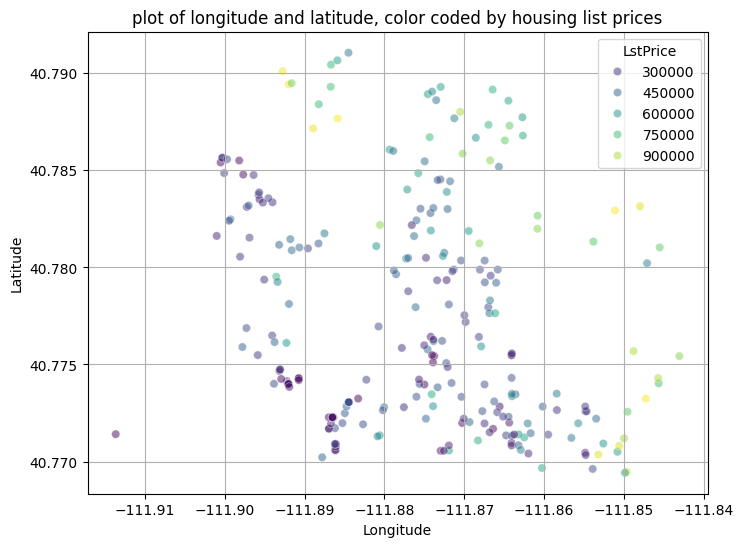

In [364]:
plt.figure(figsize=(8 , 6))

sns.scatterplot(x='Longitude', y = 'Latitude' , data = filtered_data, hue = 'LstPrice' , palette= 'viridis' , alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('plot of longitude and latitude, color coded by housing list prices')
#plt.colorbar(label = 'House List Price')
plt.grid(True)
plt.show

### Task 4 observations
- east and north homes are seen to be greater in price
- this is due to the close proximity with the mountain's foothills in SLC
- homes closer to the mountains are seen to be more desireble 
- homes deeper in the valley have lower list price values 

# Task 5: Simple Linear Regresiion

In [365]:
import statsmodels.api as sm 

#constant is the list price data
x = sm.add_constant(filtered_data['LstPrice'])
y = filtered_data['SoldPrice']

results = sm.OLS(y, x).fit()

print(results.summary())


#TODO ADD SOME OTHER VARIABLES TO CHECK AGAINST THE SOLD PRICE?





                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.611e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):          2.97e-261
Time:                        17:27:43   Log-Likelihood:                -2927.2
No. Observations:                 260   AIC:                             5858.
Df Residuals:                     258   BIC:                             5866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+04   2948.953      4.465      0.0

## Analysis
- *R Squared:* 0.990. this is a very high R^2 value and explains the minimal variations between list price and sold price. A house consistently sells close to it's list price.
- *Beta_1:* 0.9441. The Beta 1 value is the slope coefficient , it describes the expected change in the dependent variable, sold price, and independent variable, list price. We use the list price in this case to make predictions on how the sold price is expected to change. Since the beta 1 is a positive value, it indicates a positive relationship. Because the value is so close to 1, it represents that this relationship is almost 1 to 1. For example, if the list price is increased by a dollar, the sold price will increase by about 94.41 cents. 

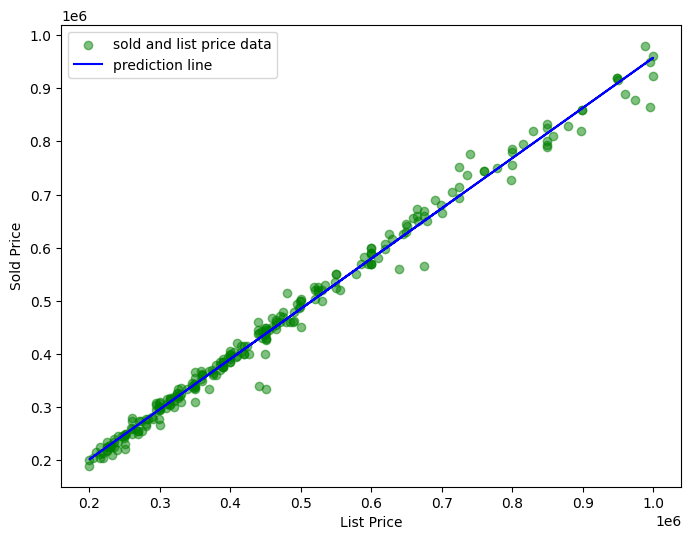

In [366]:
plt.figure(figsize= (8 ,6 ))
plt.scatter(filtered_data['LstPrice'], filtered_data['SoldPrice'], alpha= 0.5, label = 'sold and list price data', color= 'green')
predictions= results.predict(x)

plt.plot(filtered_data['LstPrice'], predictions, color = 'blue', label= 'prediction line')
plt.ylabel('Sold Price')
plt.xlabel('List Price')
plt.legend()
plt.show()

# Task 6: Multilinear Regression


In [367]:
# choose variables within my data set that can be used to predice the sold price

x = filtered_data[['Acres', 'GaragCap', 'Latitude', 'Longitude', 'Patio', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]

x = sm.add_constant(x)

y = filtered_data['SoldPrice']

results2 = sm.OLS(y, x).fit()
print(results2.summary())




                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     118.4
Date:                Tue, 28 May 2024   Prob (F-statistic):           7.00e-85
Time:                        17:27:43   Log-Likelihood:                -3312.9
No. Observations:                 260   AIC:                             6646.
Df Residuals:                     250   BIC:                             6681.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.457e+08    5.5e+07      4.468      0.0

## multilinear regression analysis

### variables used for analysis 
- `Acres`, `GarageCap`, `Latitude`, `Longitude`, `Patio`, `TotBed`, `TotBth`, `TotSqf`, `YearBlt`

This regression model helps predict the Dependent Variable of `SoldPrice`
The R-Squared value is 0.810, which helps determine the proportion of the variance in the `SoldPrice`. In this case, 81% of the variance of SoldPrice can be explained by this model 
The next important values in the model of the beta 1 value slope coefficients. This helps explain the expected change on the dependent value: `SoldPrice` based on the independent values being measured

### best predictors for `SoldPrice`
To determine which variables are most important for predicting the SalePrice, we can look at the t and P values.
If we go for a significance value of 0.05 , a t value with a great absoulte value than 1.96 is considered statistically significant
In this case, the model shows the best predictors for `SoldPrice` to be `Acres`, `GaragCap`, `Longitude`, `TotBth`, and `TotSqf`
These variables have low p values

Specific questions:

Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.
- The coefficient for `TotSqf` is 74.2343. This suggests that each additional square foot of the house adds $74.23 to the `SoldPrice`.

Estimate the value that each Garage space adds to a house.
- The coefficent for `GaragCap` is 33,970. This indicates that more garage space can add $33,970 to the `SoldPrice` of the house.

Does latitude or longitude have an impact on house price? Explain.
- the coefficient value for `Latitude` is 1.319e^6, however the p-value is 0.312, further indicating that this does not have a statistically significant impact on housing price. Latitude represents houses located on a north and south axis. This shows that in SLC, houses located to the north or south may not vary much in their price. 
- the coefficient value for `Longitude` is 2.678e^6, and the p-value is 0.000. This indicates that the Longitude is greatly significant in the evaluation of a houses `SoldPrice`. 

If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?
- It would be difficult to create model that predicts the `SoldPrice` much better than the `LstPrice` does due to it's high R-Squared value of .990. However, some of the significant factors which were evalutated in the multivariable model can be used to make some predictions on the houses selling value. Specifically, looking athte `Longitude`, `TotSqf`, and `GaragCap`. These values were very siginificant in reperesenting a higher sell price. 

# Task 7 Incoroprating a categorical variable


<function matplotlib.pyplot.show(close=None, block=None)>

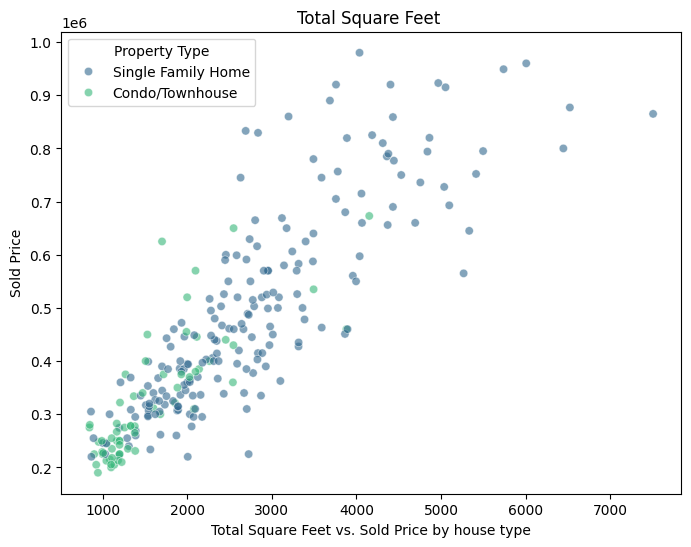

In [368]:
property_type_scatter_map = {0: 'Condo/Townhouse', 1 : 'Single Family Home'}
filtered_data['Prop_Type'] = filtered_data['PropTypeNum'].map(property_type_scatter_map)

plt.figure(figsize=(8,6))
sns.scatterplot(data= filtered_data, x = 'TotSqf', y='SoldPrice', hue = 'Prop_Type', palette='viridis', alpha = 0.6)
plt.title('Total Square Feet ')
plt.legend(title = 'Property Type')
plt.ylabel('Sold Price')
plt.xlabel('Total Square Feet vs. Sold Price by house type')
plt.show

## Explanation
- The confoudning variable in this data is the `TotSqf`. This is becaause it is correlated with the different propery types and their sizes. Different types of properties can greatly vary in their total square footage and larger properties in general are seen to sell for a higher price.
- With including hte `TotSqf` in this data, it greatly impacts the visualization of the scatterplot., This further demonstrates that the size of a property may have a greater affect on the `SoldPrice` than the `PropType`.